# **CS 1810 Homework 4**
---
To account for potential version issues, try the following in your terminal:

1. Create a new environment with `python3 -m venv venv`
2. Activate that environment with `source venv/bin/activate`
3. Make sure the interpreter in the top right corner of your VSCode (or whatever you use to run your code is venv).
4. If you get a "install kernel" message, press it.
5. Run `pip install -r requirements.txt`
6. Run the remainder of this notebook.

Note that this is not necessary but can help prevent any issues due to package versions.

**The following notebook is meant to help you work through Problem 2 on Homework 4. You are by no means required to use it, nor are you required to fill out/use any of the boilerplate code/functions. You are welcome to implement the functions however you wish.**


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from seaborn import heatmap
from scipy.spatial import distance

# Problem 1

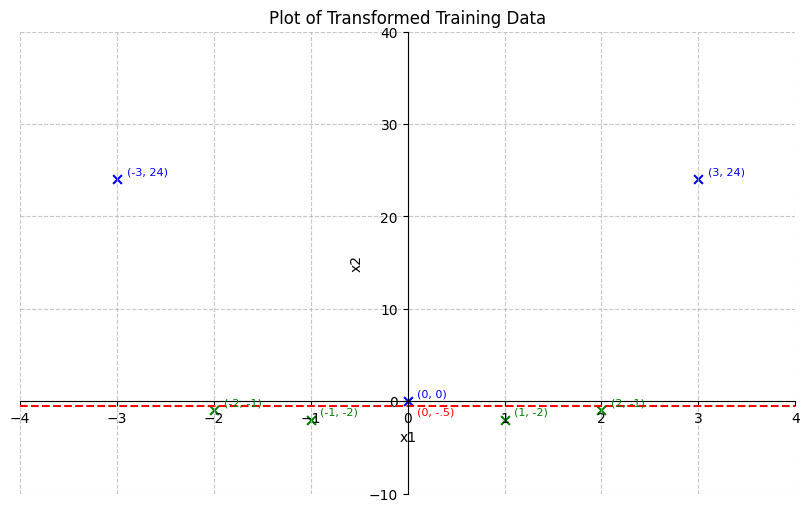

In [7]:
coordinates = [(-3, 30), (-2, 0), (-1, -2), (0, 0), (1, -2), (2, 0), (3, 30)]
coordinates2 = [(-3, 24), (-2, -1), (-1, -2), (0, 0), (1, -2), (2, -1), (3, 24)]

plt.figure(figsize=(10, 6))

for x, y in coordinates2:
    color = 'green' if y < 0 else 'blue'
    plt.scatter(x, y, color=color, marker='x', s=40)
    plt.text(x + 0.1, y + 0.5, f'({x}, {y})', fontsize=8, color=color) 

plt.xlabel('x1')
plt.ylabel('x2')

plt.xlim(-4, 4)
plt.ylim(-10, 40)

plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Plot of Transformed Training Data')

ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

x2_horizontal = -.5
plt.axhline(y=x2_horizontal, color='red', linestyle='--', linewidth=1.5)
plt.text(0.1, x2_horizontal - 1, '(0, -.5)', color='red', fontsize=8)

plt.savefig("img_output/plot.pt7.png")

plt.show()


In [57]:
# Loading datasets

small_dataset = np.load("data/small_dataset.npy")
small_labels = np.load("data/small_dataset_labels.npy").astype(int)
large_dataset = np.load("data/large_dataset.npy")

## K-Means

In [81]:
import numpy as np
import matplotlib.pyplot as plt

class KMeans(object):
    # K is the K in KMeans
    def __init__(self, K):
        self.K = K
        self.centers = None
        self.r = None
        self.X = None
        self.losses = []

    def __compute_distances(self):
        return np.linalg.norm(self.X[:, np.newaxis] - self.centers, axis=2)

    def __compute_loss(self):
        loss = 0
        for k in range(self.K):
            cluster = self.X[self.r==k]
            loss += np.sum((cluster - self.centers[k])**2)
        return loss
    
    def __initialize_centers(self):
        N = self.X.shape[0]
        self.centers = self.X[np.random.choice(N, self.K, replace=False)]

    def __update_centers(self):
        N, D = self.X.shape
        new_centers = np.zeros((self.K,D))
        for k in range(self.K):
            cluster = self.X[self.r == k]
            if len(cluster) > 0:
                new_centers[k] = np.mean(cluster, axis=0)
            else:
                new_centers[k] = self.X[np.random.choice(N)]
        self.centers = new_centers

    def fit(self, X):
        """
        Run the k-Means algorithm for exactly 10 iterations.

        :param X: a (N x 784) array since the dimension of each image is 28x28
        """
        self.X = X
        self.__initialize_centers()
        for _ in range(10):
            distances = self.__compute_distances()
            self.r = np.argmin(distances, axis=1)
            self.__update_centers()
            self.losses.append(self.__compute_loss())
        
    def plot_verify_objective(self):
        """
        This should plot the objective as a function of iteration and verify that it never increases.

        This assumes that fit() has already been called.
        """
        plt.figure(figsize=(15,10))
        plt.plot(range(1, len(self.losses)+1), self.losses, marker="x")
        plt.title("K-means objective as function of iterations")
        plt.xlabel("iteration #")
        plt.ylabel("loss")
        plt.savefig("img_output/2.1.png")
        plt.show()

    def get_mean_images(self):
        """ 
        This should return the arrays for K images. Each image should represent the mean of each of the fitted clusters.
        """
        return self.centers

    def get_cluster_sizes(self):
        return [np.sum(self.r == k) for k in range(self.K)]

### Part 1

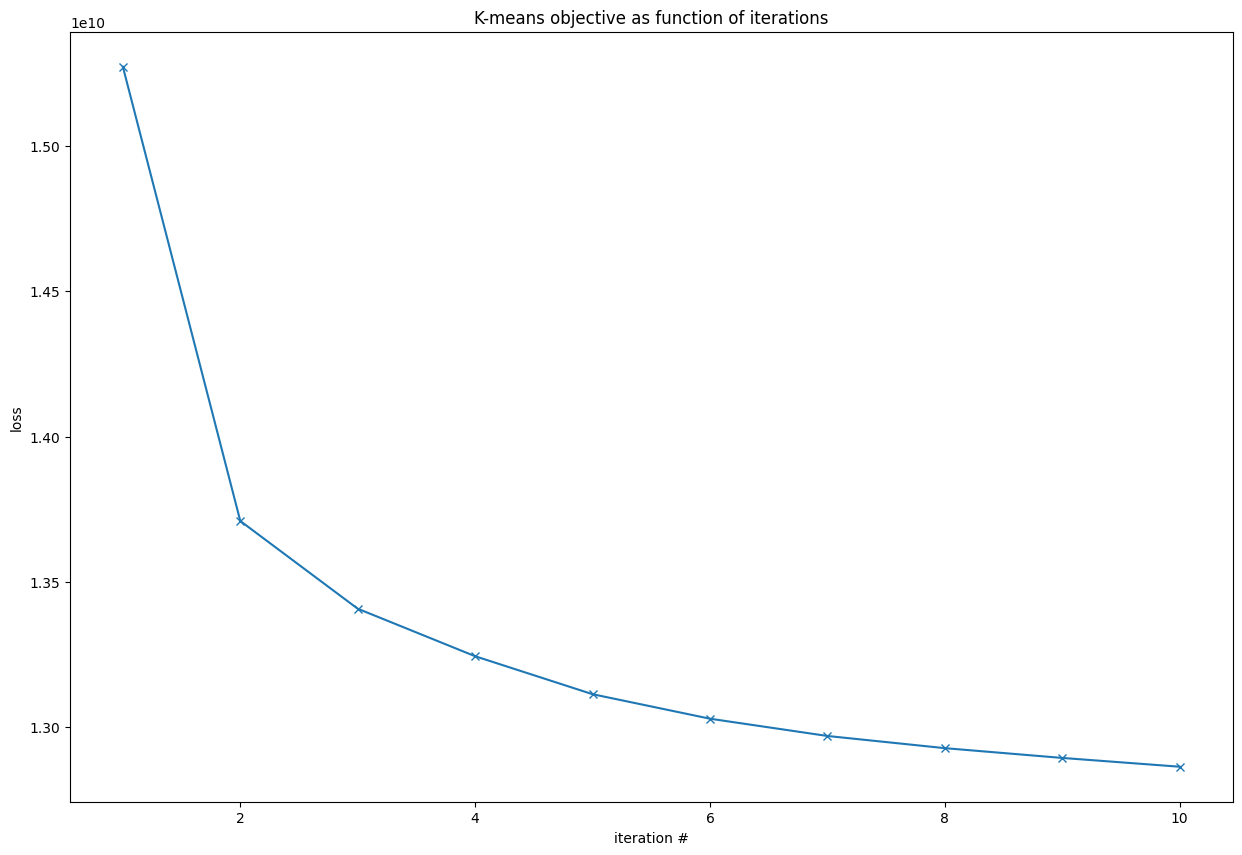

In [82]:
KMeansClassifier = KMeans(K=10)
KMeansClassifier.fit(large_dataset)
KMeansClassifier.plot_verify_objective()

### Code for plots in part 2 and 3

In [83]:
def make_mean_image_plot(data, standardized = False, filename=None):
    niters = 3
    K = 10
    allmeans = np.zeros((K, niters, 784))
    for i in range(niters):
        KMeansClassifier = KMeans(K=K)
        KMeansClassifier.fit(data)
        allmeans[:,i] = KMeansClassifier.get_mean_images()
    fig = plt.figure(figsize=(10,10))
    plt.suptitle('Class mean images across random restarts' + (' (standardized data)' if standardized else ''), fontsize=16)
    for k in range(K):
        for i in range(niters):
            ax = fig.add_subplot(K, niters, 1+niters*k+i)
            plt.setp(ax.get_xticklabels(), visible=False)
            plt.setp(ax.get_yticklabels(), visible=False)
            ax.tick_params(axis='both', which='both', length=0)
            if k == 0: plt.title('Iter '+str(i))
            if i == 0: ax.set_ylabel('Class '+str(k), rotation=90)
            plt.imshow(allmeans[k,i].reshape(28,28), cmap='Greys_r')
    if filename:
        plt.savefig(f'img_output/{filename}') 
    plt.show()

### Part 2

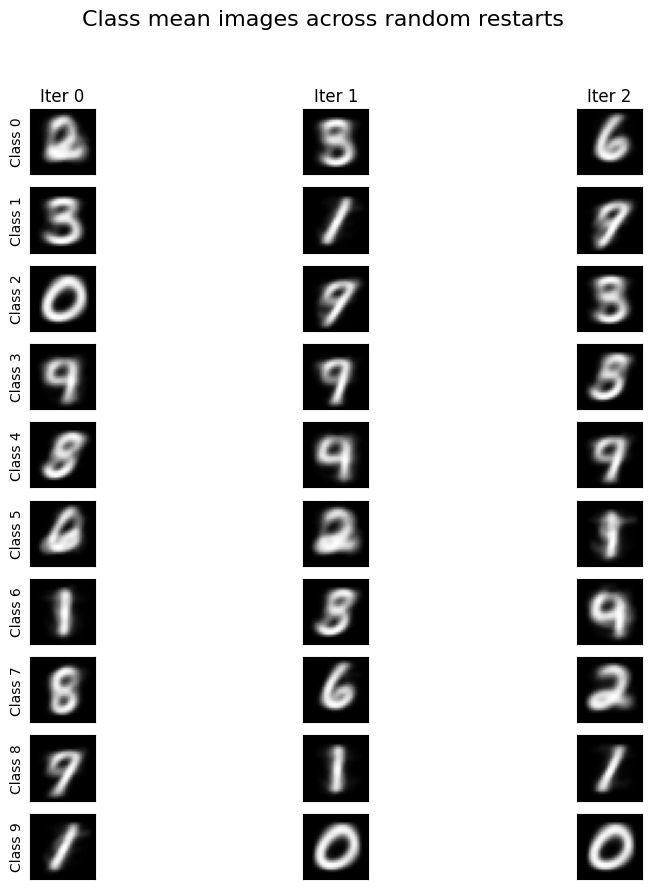

In [84]:
make_mean_image_plot(large_dataset, filename='p2.2.png')

### Part 3

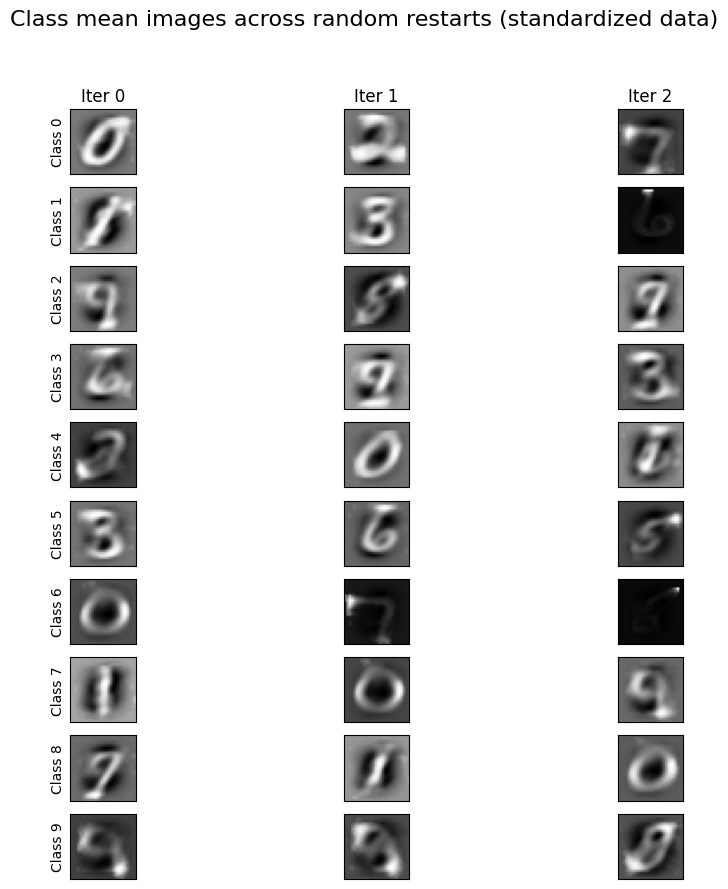

In [86]:
dataset_mean = np.mean(large_dataset, axis=0)
dataset_stdev = np.std(large_dataset, axis=0)
dataset_stdev[dataset_stdev==0] = 1

large_dataset_std = (large_dataset - dataset_mean) / dataset_stdev

make_mean_image_plot(large_dataset_std, standardized = True, filename='p2.3.png')

## HAC: Part 4


In [99]:
from scipy.spatial.distance import cdist

class HAC(object):
    def __init__(self, linkage):
        self.linkage = linkage
        self.clusters = None
        self.merges = []
        self.X = None

    def __compute_distance(self):
        # NOTE: self.X[:,None] reshapes X from (N,D) to (N,1,D)
        return np.linalg.norm(self.X[:, None] - self.X[None, :], axis=2)

    def __initialize_clusters(self):
        N = self.X.shape[0]
        self.clusters = [[i] for i in range(N)]

    def fit(self, X):
        self.X = X
        self.__initialize_clusters()
        pair_dist = self.__compute_distance()
        # prevent self-merging & thus getting stuck in infinite loop
        np.fill_diagonal(pair_dist, np.inf)
        while len(self.clusters) > 1: # repeat until left with single cluster
            min_dist = np.inf
            min_i, min_j = None, None
            for i in range(len(self.clusters)):
                for j in range(i+1, len(self.clusters)):
                    ci, cj = self.clusters[i], self.clusters[j]
                    if self.linkage=="min":
                        dist = np.min(pair_dist[np.ix_(ci, cj)])
                    elif self.linkage=="max":
                        dist = np.max(pair_dist[np.ix_(ci, cj)])
                    elif self.linkage=="centroid":
                        mu_i = self.X[ci].mean(axis=0, keepdims=True)
                        mu_j = self.X[cj].mean(axis=0, keepdims=True)
                        dist = cdist(mu_i,mu_j)[0,0]
                    else:
                        raise ValueError("invalid linkage")
                    if dist < min_dist:
                        min_dist = dist
                        min_i, min_j = i,j

            if (min_i is None) and (min_j is None):
                raise RuntimeError("no valid clusters to merge")
            
            ci, cj = self.clusters[min_i], self.clusters[min_j]
            self.clusters.append(ci + cj)
            self.merges.append((ci,cj))
            
            # popping changes indices - need to be careful
            self.clusters.pop(max(min_i,min_j))
            self.clusters.pop(min(min_i,min_j))

    def get_k_clusters(self, K):
        N = self.X.shape[0]
        labels = np.arange(N)

        for ci,cj in self.merges[:(N-K)]:
            for i in cj:
                labels[i] = labels[ci[0]]
        
        _, clusters = np.unique(labels, return_inverse=True)
        return clusters

    def get_mean_images(self, K):
        clusters = self.get_k_clusters(K)
        return np.array([self.X[clusters == k].mean(axis=0) for k in range(K)])

    def get_cluster_sizes(self, K):
        clusters = self.get_k_clusters(K)
        return [np.sum(clusters==k) for k in range(K)]

### Part 4: This takes ~6 minutes to run

Done: max
Done: min
Done: centroid


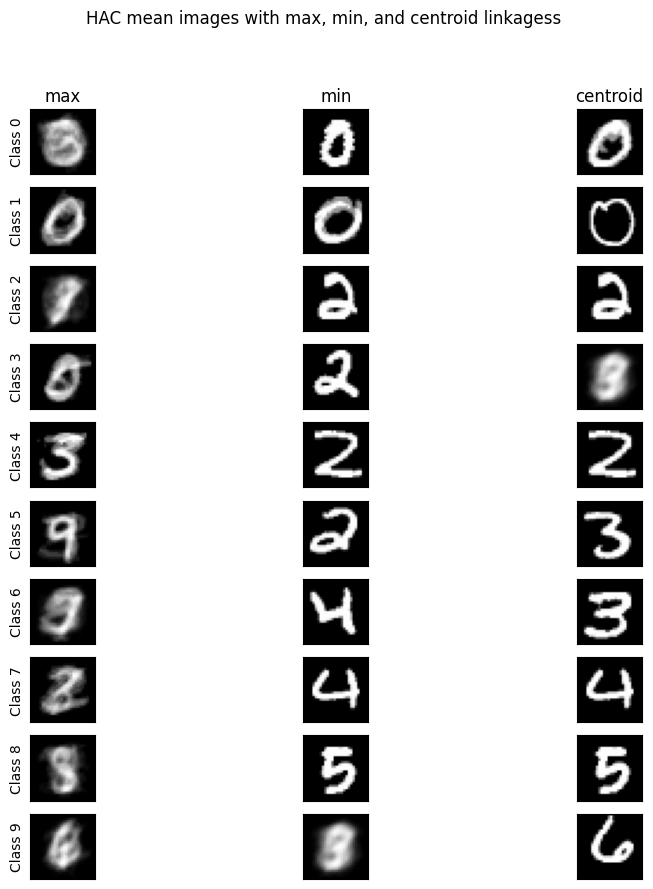

In [100]:
LINKAGES = [ 'max', 'min', 'centroid' ]
n_clusters = 10
cluster_sizes = []

fig = plt.figure(figsize=(10,10))
plt.suptitle("HAC mean images with max, min, and centroid linkagess")
for l_idx, l in enumerate(LINKAGES):
    # Fit HAC
    hac = HAC(l)
    hac.fit(small_dataset)
    mean_images = hac.get_mean_images(n_clusters)
    cluster_sizes.append(hac.get_cluster_sizes(n_clusters)) # used in Part 8, append here to avoid re-fitting
    # Make plot
    for m_idx in range(mean_images.shape[0]):
        m = mean_images[m_idx]
        ax = fig.add_subplot(n_clusters, len(LINKAGES), l_idx + m_idx*len(LINKAGES) + 1)
        plt.setp(ax.get_xticklabels(), visible=False)
        plt.setp(ax.get_yticklabels(), visible=False)
        ax.tick_params(axis='both', which='both', length=0)
        if m_idx == 0: plt.title(l)
        if l_idx == 0: ax.set_ylabel('Class '+str(m_idx), rotation=90)
        plt.imshow(m.reshape(28,28), cmap='Greys_r')
    print("Done:", l)
plt.savefig('img_output/p2.4.png') 
plt.show()

### Part 5:

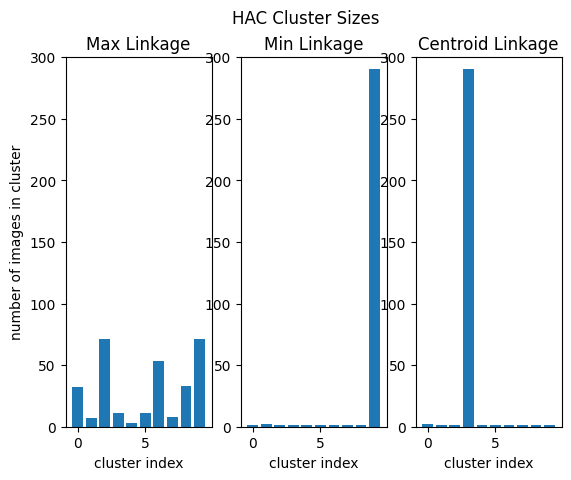

In [101]:
# HAC graphs
def plot_cluster_sizes(n_clusters, cluster_sizes, filename=None):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.suptitle("HAC Cluster Sizes")
    ax1.set_ylabel('number of images in cluster')
    cluster_idxs = [i for i in range(n_clusters)]

    def plot_sizes_per_linkage(ax, sizes, linkage):
        ax.bar(cluster_idxs, sizes)
        ax.set_title(f'{linkage} Linkage')
        ax.set_xlabel('cluster index')
        ax.set_ylim(0, 300)

    plot_sizes_per_linkage(ax1, cluster_sizes[0], 'Max')
    plot_sizes_per_linkage(ax2, cluster_sizes[1], 'Min')
    plot_sizes_per_linkage(ax3, cluster_sizes[2], 'Centroid')
    if filename:
        plt.savefig(f'img_output/{filename}') 
    plt.show()
plot_cluster_sizes(n_clusters, cluster_sizes, filename='p2.5a.png')

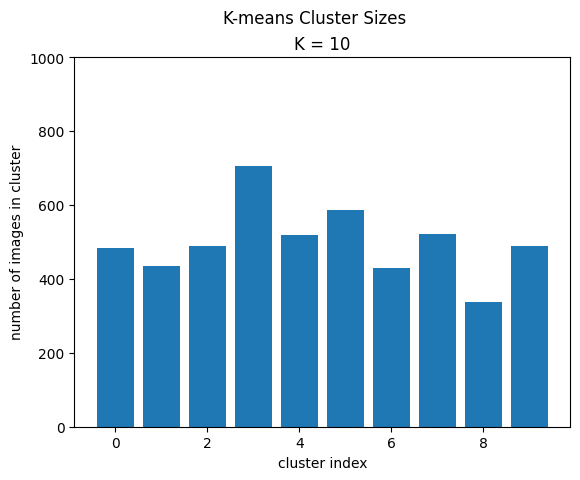

In [102]:
# K-means graphs
def plot_cluster_sizes(n_clusters, cluster_sizes, filename=None):
    fig, (ax) = plt.subplots(1, 1)
    fig.suptitle("K-means Cluster Sizes")
    ax.set_ylabel('number of images in cluster')
    cluster_idxs = [i for i in range(n_clusters)]

    def plot_sizes_per_linkage(ax, sizes, k):
        ax.bar(cluster_idxs, sizes)
        ax.set_title(f'K = {k}')
        ax.set_xlabel('cluster index')
        ax.set_ylim(0, 1000)

    plot_sizes_per_linkage(ax, cluster_sizes, str(n_clusters))
    if filename:
        plt.savefig(f'img_output/{filename}') 
    plt.show()

plot_cluster_sizes(KMeansClassifier.K, KMeansClassifier.get_cluster_sizes(), filename='p2.5b.png')

### Part 6: Confusion Matrix

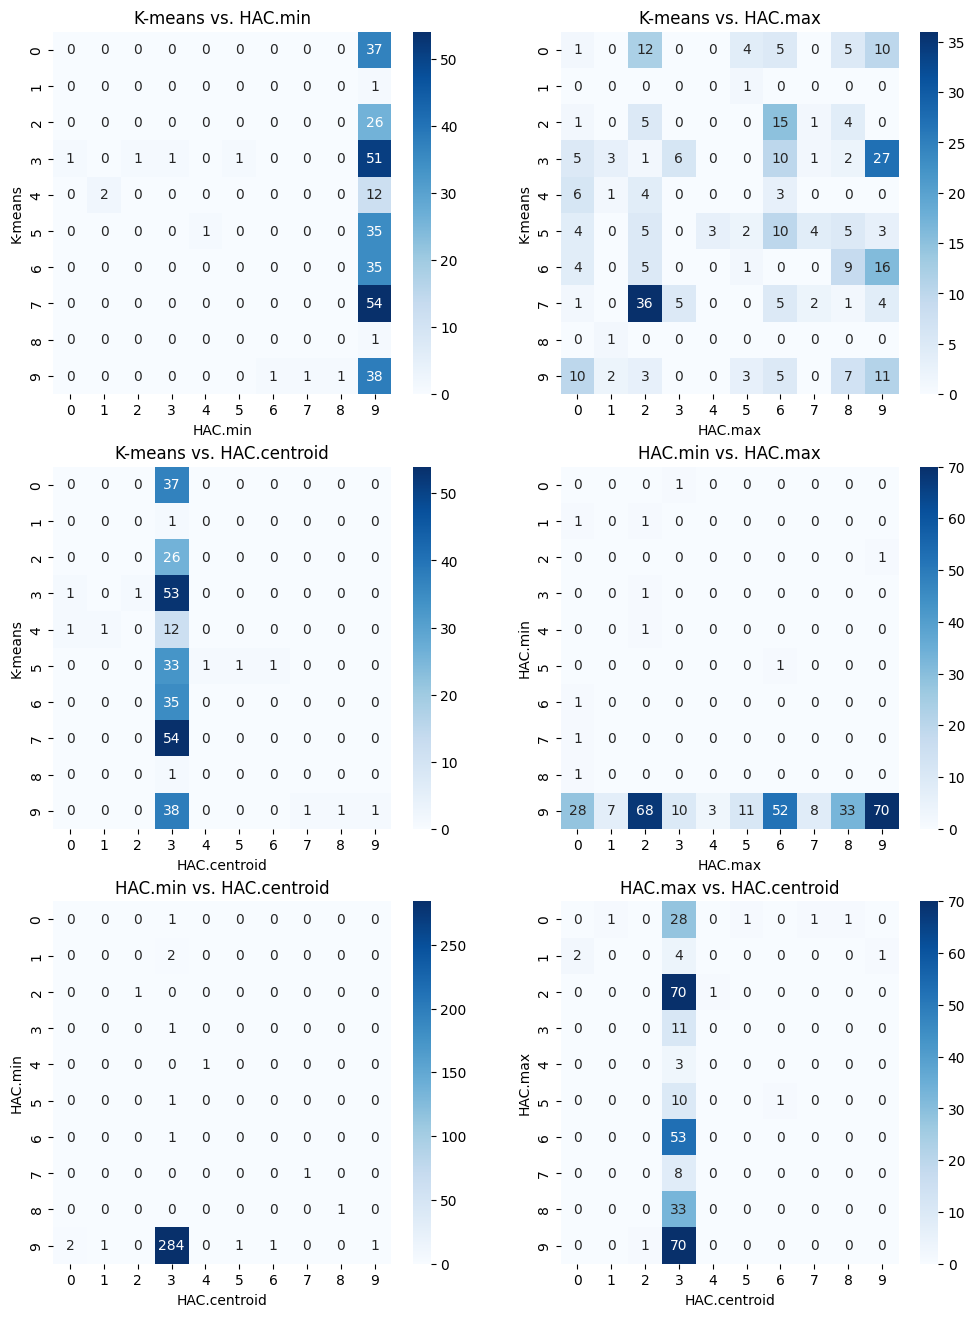

In [103]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

kmeans = KMeans(K=10)
kmeans.fit(small_dataset)
kmeans_clusters = kmeans.r

hac_min = HAC(linkage="min")
hac_min.fit(small_dataset)
hac_min_clusters = hac_min.get_k_clusters(10)

hac_max = HAC(linkage="max")
hac_max.fit(small_dataset)
hac_max_clusters = hac_max.get_k_clusters(10)

hac_centroid = HAC(linkage="centroid")
hac_centroid.fit(small_dataset)
hac_centroid_clusters = hac_centroid.get_k_clusters(10)

method_map = {
    "K-means": kmeans_clusters,
    "HAC.min": hac_min_clusters,
    "HAC.max": hac_max_clusters,
    "HAC.centroid": hac_centroid_clusters
}
methods = list(method_map.keys())

fig, axes = plt.subplots(3,2,figsize=(12,16))
axes = axes.flatten()

pair_idx = 0
for i in range(len(methods)):
    for j in range(i+1, len(methods)):
        labels_1 = method_map[methods[i]]
        labels_2 = method_map[methods[j]]

        cm = confusion_matrix(labels_1, labels_2)
        sns.heatmap(cm, annot=True, fmt="d", ax=axes[pair_idx], cmap="Blues")
        axes[pair_idx].set_title(f"{methods[i]} vs. {methods[j]}")
        axes[pair_idx].set_xlabel(methods[j])
        axes[pair_idx].set_ylabel(methods[i])
        pair_idx += 1

plt.savefig("confusion.png")

plt.show()